# Setup

## Dependencies

The view is currently made with Vega which can be integrated in a **Jupyter notebook** with the ipyvega module (https://github.com/vega/ipyvega). To install vega and its dependencies from the Python Package Index using pip, use the following commands:
````
pip install jupyter pandas vega
pip install --upgrade notebook  # need jupyter_client >= 4.2 for sys-prefix below
jupyter nbextension install --sys-prefix --py vega  # not needed in notebook >= 5.3     
````
This notebook won't work with JupyterLab.

If you use a virtual environement, you may need to link it to a Jupyter kernel with:
```
 python -m ipykernel install --user --name=vastchallenge
````
and select the `vastchallenge` kernel in Jupyter after a restart of the Jupyter server.

Vega should be the lastest version (3.4.0), check the reuslt of the cell below.

If the output of the final cell is empty, you may have forgotten to instyall the Jupyter notebook extension (last command above).

In [1]:
import vega; print(vega.__version__)

3.4.0


## Files

The following files should be in the same folder as the notebook:
- process.py
- spec_minimal.vg.json

# Data input

The applet expects:
- two person graphs (edge list and node list)
- one or more pairing files between the nodes of these two graphs
- a list of pairwise similarity measures between person nodes

## Format

The edges lists should have the following columns: `Source`,`eType`,`Target`,`Time`,`Weight` (not used currently). The node list should have the following columns: `NodeID`,`NodeType` with `NodeID` coherent with the corresponding edge list. The pairing list should contain only Person node pairs, defined with the following columns: `candidateID` and `templateID`, coherent with the ids given in the correpsonding edge and node lists. The distance list should also have columns `templateID` and `candidateID` as well as one column per distance metric to use.

## Details
The pairing list does not necessarly pair all the nodes.
The distance list may have empty cells. Values should be in $[0,1]$ with 1 being more similar.

## Examples
Path to file works from the notebook file folder. Change `PATH_TO_NOTEBOOK` according to where you run it.


In [2]:
PATH_TO_NOTEBOOK = ""

### Edge list format

In [3]:
import pandas as pd

template_edges = pd.read_csv(PATH_TO_NOTEBOOK+"../../data/CGCS-Template.csv")
template_edges.head()

Source  eType  Target    Time  Weight  SourceLocation  TargetLocation  \
0       0      4     -99     -99     -99             NaN             NaN   
1      41      0      34   86400       1             NaN             NaN   
2      37      0      27   94461       1             NaN             NaN   
3      34      1      27  107548       1             5.0             5.0   
4      41      0      37  127838       1             NaN             NaN   

   SourceLatitude  SourceLongitude  TargetLatitude  TargetLongitude  
0             NaN              NaN             NaN              NaN  
1             NaN              NaN             NaN              NaN  
2             NaN              NaN             NaN              NaN  
3             NaN              NaN             NaN              NaN  
4             NaN              NaN             NaN              NaN

### Node list format

In [4]:
template_nodes = pd.read_csv(PATH_TO_NOTEBOOK+"../../data/CGCS-Template-NodeTypes.csv")
template_nodes.head()

NodeID  NodeType
0     -99         3
1       0         1
2       2         1
3      27         1
4      29         1

### Pairing list format

Some pairing were precomputed in the `data/results/` folder

# Using the view

Input dataframe: `template_edges`, `template_nodes`, `candidate_edges`, `candidate_nodes`, `pairing` and `distances`. Example with graph 2 and pairing computed from metric `profileJaccard`.


In [5]:
pairing =  pairing = pd.read_json(PATH_TO_NOTEBOOK+"../../data/results/Q2-GreedyFinancialSeed1.pairing.json", orient='index')
pairing.columns = ["candidateID"]
pairing["templateID"] = pairing.index
pairing.head()

candidateID  templateID
61       508913          61
58       461719          58
60       614986          60
59       476973          59
40       643925          40

### Distance list format

The visualization displays similarity scores for each pair of nodes.



In [6]:
from process import get_similarity_list 

similarities = get_similarity_list(pairing["candidateID"].unique())
similarities.head()

templateID  candidateID  Financial profile  Travel profile  \
0           0       456760           0.777412             NaN   
1           0       456760           0.777412             NaN   
2           0       456761           0.817325             NaN   
3           0       456762           0.852923             NaN   
4           0       456765           0.858004             NaN   

   Graphlet profile  Temporal profile  
0          0.833333          0.918729  
1          0.833333          0.926488  
2          0.952381          0.879599  
3          0.761905               NaN  
4          0.761905               NaN

In [7]:
from process import normalize_metric_values, extract_subgraph_nodes

candidate_edges =  pd.read_csv(PATH_TO_NOTEBOOK+"../../data/results/Q2-GreedyFinancialSeed1.csv")
candidate_nodes =  pd.read_csv(PATH_TO_NOTEBOOK+"../../data/CGCS-GraphData-NodeTypes.csv")
candidate_nodes = extract_subgraph_nodes(candidate_nodes, candidate_edges)
categories = pd.read_csv(PATH_TO_NOTEBOOK+"../../data/DemographicCategories.csv")


Processing should take less than 5 minutes. Unpaired nodes are hidden (count provided in view title). Edges are for the communication channels. Dates aligned between tmeplate and candidate edges (14-day shift). Hover over elements for details.

['Financial profile', 'Travel profile', 'Graphlet profile', 'Temporal profile']


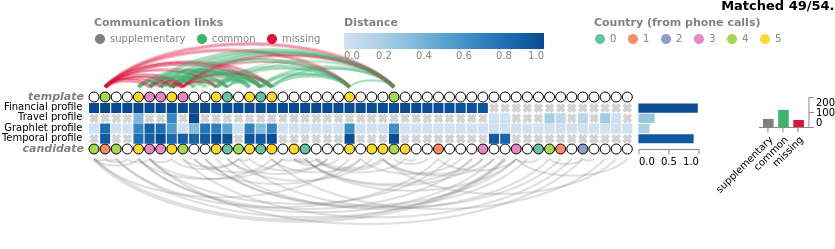

In [8]:
from process import view
view(template_edges, template_nodes, candidate_edges, candidate_nodes, pairing, similarities, categories)


Or with an empty distance file:

[]


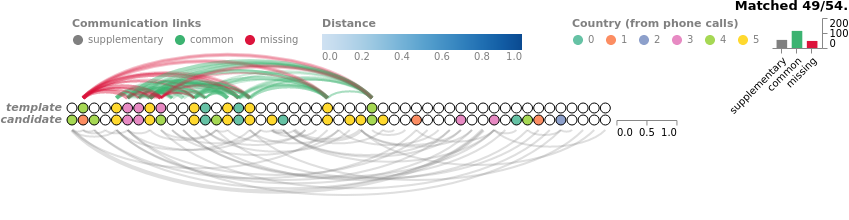

In [11]:
similarities = pd.DataFrame(columns=["templateID", "candidateID", "templateType", "candidateType"]) 

view(template_edges, template_nodes, candidate_edges, candidate_nodes, pairing, similarities, categories)
